# IC50 exploration

This notebook demonstrates how to process plates associated to the paper [A SARS-CoV-2 cytopathicity dataset generated by high-content screening of a large drug repurposing collection](https://doi.org/10.1038/s41597-021-00848-4).
We explore the metadata linked to [idr0094-ellinger-sarscov2](https://idr.openmicroscopy.org/search/?query=Name:idr0094).

You can also explore the data and calculate the IC50 for each compound using the [Shiny app](https://binder.bioimagearchive.org/v2/gh/IDR/idr0094-ellinger-sarscov2/master?urlpath=shiny/apps/).
This notebook uses the Web API to load the data in R.

## Collect parameters

In [1]:
# Parameters:
screenId = 2603


### Load the libraries

In [60]:
# Load the libraries
suppressPackageStartupMessages(library(jpeg))
suppressPackageStartupMessages(library(dplyr))
suppressPackageStartupMessages(library(drc))
library(jsonlite)

### URL used to load data 

In [3]:
THUMB_URL <- "https://idr.openmicroscopy.org/webgateway/render_thumbnail/"
TABLE_URL <- "https://idr.openmicroscopy.org/webgateway/table/Screen/"
WELLS_URL <- "https://idr.openmicroscopy.org/api/v0/m/wells/"

### Load the metadata associated to the study
Prepare the URL and load the data as JSON and convert the json into a R-dataframe.

In [4]:
url = paste(TABLE_URL, screenId, "/query/?query=*", sep="")

In [5]:
json <- jsonlite::fromJSON(url)

In [6]:
df <- data.frame(json$data$rows)
colnames(df) <- json$data$columns
df

Plate,Well,Characteristics [Organism 1],Term Source 1 REF,Term Source 1 Accession,Characteristics [Organism 2],Term Source 2 REF,Term Source 2 Accession,Characteristics [Cell Line],Term Source 3 REF,⋯,Control Type,Quality Control,Channels,Compound Concentration (microMolar),Percentage Inhibition (DPC),Cells - Number of Objects,Hit Compound (over 75% activity),Phenotype Annotation Level,Plate Name,Well Name
<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,⋯,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
7815,1560940,Homo sapiens,NCBITaxon,NCBITaxon_9606,Severe acute respiratory syndrome coronavirus 2,NCBITaxon,NCBITaxon_2697049,Caco-2,EFO,⋯,,pass,cell body,20,54.9,19819,Yes,well level,ESP0025712,a1
7815,1560905,Homo sapiens,NCBITaxon,NCBITaxon_9606,Severe acute respiratory syndrome coronavirus 2,NCBITaxon,NCBITaxon_2697049,Caco-2,EFO,⋯,,pass,cell body,20,70.28,23010,Yes,well level,ESP0025712,a2
7815,1560897,Homo sapiens,NCBITaxon,NCBITaxon_9606,Severe acute respiratory syndrome coronavirus 2,NCBITaxon,NCBITaxon_2697049,Caco-2,EFO,⋯,,pass,cell body,20,73.25,23627,Yes,well level,ESP0025712,a3
7815,1560924,Homo sapiens,NCBITaxon,NCBITaxon_9606,Severe acute respiratory syndrome coronavirus 2,NCBITaxon,NCBITaxon_2697049,Caco-2,EFO,⋯,,pass,cell body,20,0.56,8544,Yes,well level,ESP0025712,a4
7815,1560856,Homo sapiens,NCBITaxon,NCBITaxon_9606,Severe acute respiratory syndrome coronavirus 2,NCBITaxon,NCBITaxon_2697049,Caco-2,EFO,⋯,,pass,cell body,20,-3.4,7723,Yes,well level,ESP0025712,a5
7815,1560847,Homo sapiens,NCBITaxon,NCBITaxon_9606,Severe acute respiratory syndrome coronavirus 2,NCBITaxon,NCBITaxon_2697049,Caco-2,EFO,⋯,,pass,cell body,20,38.08,16329,Yes,well level,ESP0025712,a6
7815,1560899,Homo sapiens,NCBITaxon,NCBITaxon_9606,Severe acute respiratory syndrome coronavirus 2,NCBITaxon,NCBITaxon_2697049,Caco-2,EFO,⋯,,pass,cell body,20,12.96,11116,Yes,well level,ESP0025712,a7
7815,1560862,Homo sapiens,NCBITaxon,NCBITaxon_9606,Severe acute respiratory syndrome coronavirus 2,NCBITaxon,NCBITaxon_2697049,Caco-2,EFO,⋯,,pass,cell body,20,42.41,17228,Yes,well level,ESP0025712,a8
7815,1560927,Homo sapiens,NCBITaxon,NCBITaxon_9606,Severe acute respiratory syndrome coronavirus 2,NCBITaxon,NCBITaxon_2697049,Caco-2,EFO,⋯,,pass,cell body,20,61.74,21238,Yes,well level,ESP0025712,a9


## Rename the columns to simplify exploration
The columns are renamed to simplify data access.

In [7]:
colnames(df)[names(df) == 'Compound Name'] <- "CompoundName"
colnames(df)[names(df) == 'Compound InChIKey'] <- 'InChIKey'
colnames(df)[names(df) == 'Compound Concentration (microMolar)'] <- "Concentration"
colnames(df)[names(df) == 'Percentage Inhibition (DPC)'] <- "Inhibition"

## Filter by compound
First copy the data frame and filter using the compound name the data on the copied on the data frame.
Convert the value into numerical values. Order the data by `Concentration` value.

In [8]:
compoundName <- "Remdesivir"
inChIKey <- "RWWYLEGWBNMMLJ-YSOARWBDSA-N"

In [9]:
filter_data <- function(df, value) {
    dfcopy <- cbind(df)
    dfcopy <- filter(dfcopy, CompoundName == value)
    df1 <- subset(dfcopy, select=c("Concentration", "Inhibition", "Well"))
    data <- mutate_all(df1, function(x) as.numeric(as.character(x)))
    data <- data[order(data$Concentration),]
}

In [10]:
data <- filter_data(df, compoundName)
nrow(data)
data

[1] 24

,Concentration,Inhibition,Well
,<dbl>,<dbl>,<dbl>
8,0.0064,-1.99,1561776
16,0.0064,-6.68,1561864
24,0.0064,-7.68,1561931
7,0.0200,-0.66,1561801
15,0.0200,-7.00,1561844
23,0.0200,-9.48,1561986
6,0.0630,-19.89,1561797
14,0.0630,-14.25,1561840
22,0.0630,-12.75,1561958


### Load images
Load the images associated to the wells where the selected compound was used.
* First retrieve the images associated to the well.
* Then load the thumbnails

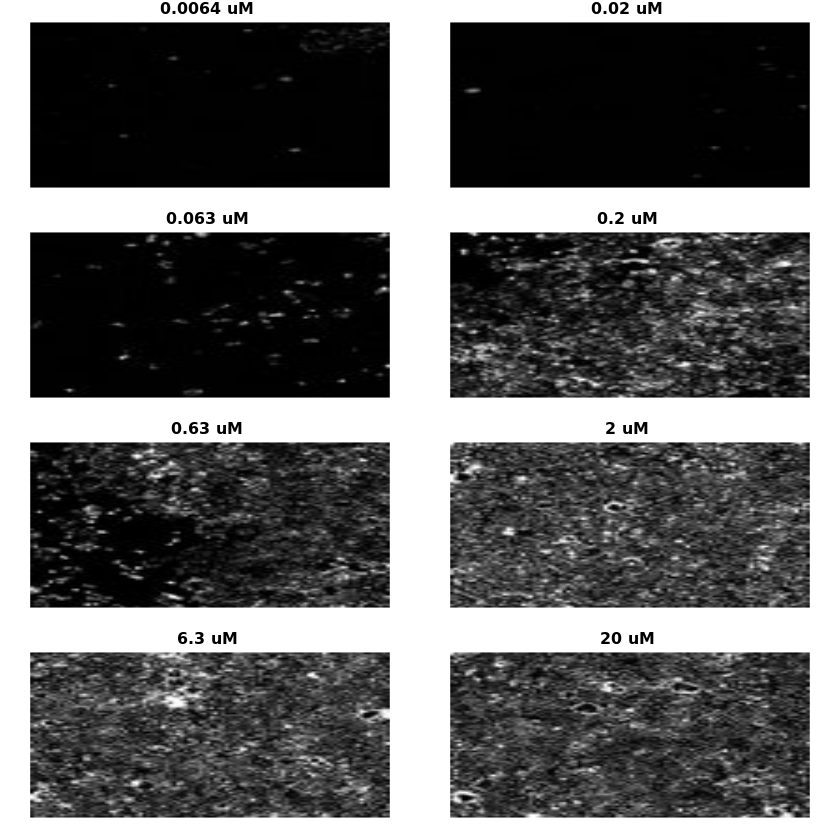

In [59]:
cols <- 2
n <- nrow(data)
m <- 4
par(mfrow = c(m, cols))
par(mar=c(1,1,1,1))
values <- vector()
for(i in 1:n) {
    row <- data[i,]
    if (!is.element(row$Concentration, values)) {
        values <- c(values, row$Concentration)
        url <- paste(WELLS_URL, toString(row$Well), "/", sep="")
        #  load images linked to the well
        wells_dataframe <- as.data.frame(jsonlite::fromJSON(url))
        value <- get("@id", wells_dataframe$data.WellSamples.Image[2])
        id_strings <- strsplit(as.character(value), " ")
        id <- id_strings[c(1)]
        # load one thumbnail
        thumb_url <- paste(THUMB_URL, id, "/96/96/", sep="")
        name = paste("/tmp/", id, ".jpeg", sep="")
        download.file(thumb_url, name)
        thumb <- jpeg::readJPEG(name)
        plot(0:1, 0:1, type="n", ann=FALSE, axes=FALSE)
        rasterImage(thumb, 0, 0, 1, 1)
        title(paste(row$Concentration, 'uM '), font.main=2)
    }
}

## Calculate the half maximal inhibitory concentration IC50

The half maximal inhibitory concentration (IC50) is a measure of the potency of a substance in inhibiting a specific biological or biochemical function. IC50 is a quantitative measure that indicates how much of a particular inhibitory substance (e.g. drug) is needed to inhibit, in vitro, a given biological process or biological component by 50%.

In [81]:
calculate_IC50 <- function(data){
  IC50 <- NA
  data.LL.4 <- NULL
  ctest <- filter(data, Inhibition != "NaN")
  data.LL.4 <- drm(Inhibition ~ Concentration, data = ctest, fct = LL.4(), control = drmc(errorm=FALSE))
  if (is.null(data.LL.4$convergence)) {
      IC50 <- ED(data.LL.4, 50, interval = "delta")[1]
  }
  returned_values <- list("ic50" = IC50, "data" = data.LL.4)
}

In [82]:
values <- calculate_IC50(data)
IC50 <- values$ic50
IC50


Estimated effective doses

       Estimate Std. Error   Lower   Upper
e:1:50  0.80772    0.12019 0.55701 1.05842


[1] 0.8077159

## Plot the Dose Response curve 

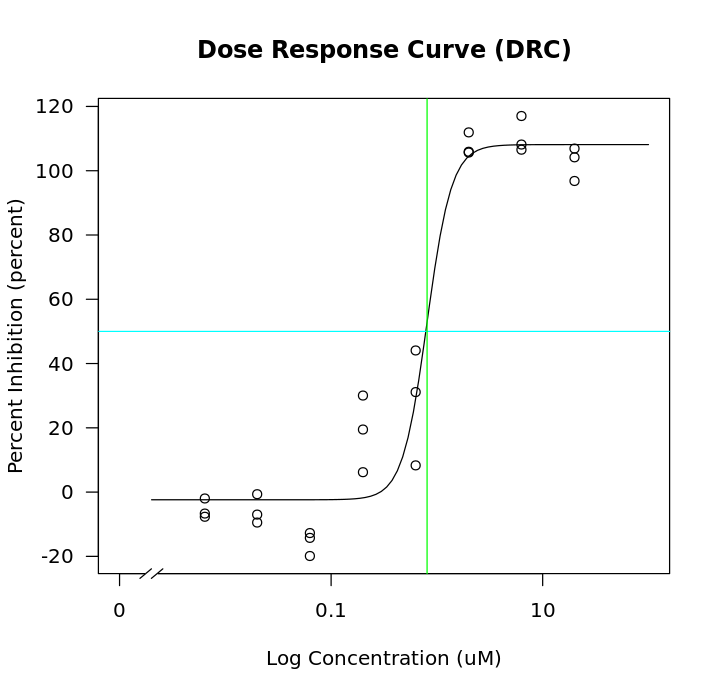

In [83]:
options(repr.plot.width=6, repr.plot.height=5.8)
plot(values$data, broken = TRUE, type = "all",
     main = "Dose Response Curve (DRC)", xlim = c(0, 100),
     xlab = "Log Concentration (uM)",
     ylab = "Percent Inhibition (percent)")
abline(h = 50, col = "cyan")
abline(v = IC50, col = "green")

## Determine IC50 for each compound

For each unique compound, determine the IC50.

In [70]:
compounds <- unique(as.vector(df["CompoundName"]))

In [71]:
ic <- vector()
cn <- vector()
for(i in 1:nrow(compounds)) {
    c <- toString(compounds[i,])
    if (c != "") {
      d <- filter_data(df, c) 
      results <- calculate_IC50(d)
      ic <- c(ic, results$ic50)
      cn <- c(cn, c)
    }
}

result <- data.frame(cn, ic)
x <- c("Compound Name", "IC50 (uM)")
colnames(result) <- x


Estimated effective doses

       Estimate Std. Error   Lower   Upper
e:1:50  1267.81     491.88  241.76 2293.85

Estimated effective doses

       Estimate Std. Error   Lower   Upper
e:1:50  186.778    119.908 -63.346 436.903

Estimated effective doses

       Estimate Std. Error    Lower    Upper
e:1:50   261.22    4481.70 -9087.43  9609.87

Estimated effective doses

        Estimate Std. Error     Lower     Upper
e:1:50  0.019343   0.028943 -0.041032  0.079718

Estimated effective doses

       Estimate Std. Error   Lower   Upper
e:1:50  2215211         10 2215190 2215232

Estimated effective doses

       Estimate Std. Error    Lower    Upper
e:1:50  0.53396    0.59522 -0.70765  1.77556

Estimated effective doses

       Estimate Std. Error    Lower    Upper
e:1:50  0.22078    0.53177 -0.88847  1.33003

Estimated effective doses

       Estimate Std. Error   Lower   Upper
e:1:50   10.700     14.973 -20.533  41.933

Estimated effective doses

       Estimate Std. Error   Lower   U

Warning message in sqrt(dEDval %*% varCov %*% dEDval):
“NaNs produced”
Warning message in sqrt(dEDval %*% varCov %*% dEDval):
“NaNs produced”



Estimated effective doses

       Estimate Std. Error Lower Upper
e:1:50   29.225         NA    NA    NA

Estimated effective doses

       Estimate Std. Error    Lower    Upper
e:1:50 0.204758   0.047877 0.104888 0.304628

Estimated effective doses

       Estimate Std. Error   Lower   Upper
e:1:50  1.95901    0.30103 1.33107 2.58695

Estimated effective doses

        Estimate Std. Error     Lower     Upper
e:1:50  0.019472   0.773058 -1.593098  1.632042

Estimated effective doses

        Estimate Std. Error     Lower     Upper
e:1:50  0.082157   0.058740 -0.040373  0.204686

Estimated effective doses

       Estimate Std. Error   Lower   Upper
e:1:50   1.7359     1.8774 -2.1803  5.6522

Estimated effective doses

       Estimate Std. Error   Lower   Upper
e:1:50   2.1868     2.5613 -3.1561  7.5297

Estimated effective doses

       Estimate Std. Error    Lower    Upper
e:1:50 0.654964   0.298671 0.031947 1.277981

Estimated effective doses

       Estimate Std. Error    Lower    U

Warning message in sqrt(dEDval %*% varCov %*% dEDval):
“NaNs produced”
Warning message in sqrt(dEDval %*% varCov %*% dEDval):
“NaNs produced”



Estimated effective doses

       Estimate Std. Error Lower Upper
e:1:50   17.291         NA    NA    NA

Estimated effective doses

       Estimate Std. Error   Lower   Upper
e:1:50   14.877     25.257 -37.809  67.563

Estimated effective doses

       Estimate Std. Error  Lower  Upper
e:1:50   5.4794     1.2597 2.8516 8.1072

Estimated effective doses

       Estimate Std. Error   Lower   Upper
e:1:50  33.7615    19.9258 -7.8029 75.3260

Estimated effective doses

       Estimate Std. Error    Lower    Upper
e:1:50   37.893     76.817 -122.344  198.129

Estimated effective doses

       Estimate Std. Error   Lower   Upper
e:1:50   12.655     26.494 -42.611  67.922

Estimated effective doses

       Estimate Std. Error    Lower    Upper
e:1:50   21.788    165.960 -324.398  367.975

Estimated effective doses

        Estimate Std. Error     Lower     Upper
e:1:50   0.10088    5.28808 -10.92986  11.13161

Estimated effective doses

        Estimate Std. Error     Lower     Upper
e:1:50

Warning message in sqrt(dEDval %*% varCov %*% dEDval):
“NaNs produced”
Warning message in sqrt(dEDval %*% varCov %*% dEDval):
“NaNs produced”



Estimated effective doses

       Estimate Std. Error Lower Upper
e:1:50   24.634         NA    NA    NA

Estimated effective doses

       Estimate Std. Error   Lower   Upper
e:1:50   53.649     37.090 -23.720 131.018
Error in optim(startVec, opfct, hessian = TRUE, method = optMethod, control = list(maxit = maxIt,  : 
  non-finite finite-difference value [4]


Warning message:
“Convergence failed. The model was not fitted!”



Estimated effective doses

       Estimate Std. Error    Lower    Upper
e:1:50   74.105    329.023 -612.225  760.434

Estimated effective doses

       Estimate Std. Error   Lower   Upper
e:1:50  0.80772    0.12019 0.55701 1.05842

Estimated effective doses

       Estimate Std. Error    Lower    Upper
e:1:50  53.6962    22.5924   6.5693 100.8231


Warning message in sqrt(dEDval %*% varCov %*% dEDval):
“NaNs produced”
Warning message in sqrt(dEDval %*% varCov %*% dEDval):
“NaNs produced”



Estimated effective doses

       Estimate Std. Error Lower Upper
e:1:50   19.868         NA    NA    NA

Estimated effective doses

          Estimate  Std. Error       Lower       Upper
e:1:50  0.00034673  0.00029747 -0.00027378  0.00096724

Estimated effective doses

       Estimate Std. Error  Lower  Upper
e:1:50   260284      80749  91845 428722

Estimated effective doses

        Estimate Std. Error     Lower     Upper
e:1:50  0.698196   0.375376 -0.084824  1.481216

Estimated effective doses

       Estimate Std. Error   Lower   Upper
e:1:50  0.60122    0.19930 0.18548 1.01695

Estimated effective doses

       Estimate Std. Error    Lower    Upper
e:1:50  0.99782    3.80203 -6.93308  8.92873


Warning message in sqrt(dEDval %*% varCov %*% dEDval):
“NaNs produced”
Warning message in sqrt(dEDval %*% varCov %*% dEDval):
“NaNs produced”



Estimated effective doses

       Estimate Std. Error Lower Upper
e:1:50   24.618         NA    NA    NA

Estimated effective doses

       Estimate Std. Error   Lower   Upper
e:1:50   892.58     246.43  378.54 1406.63

Estimated effective doses

       Estimate Std. Error    Lower    Upper
e:1:50   200.82    1314.59 -2541.37  2943.01

Estimated effective doses

       Estimate Std. Error   Lower   Upper
e:1:50   36.959     39.043 -44.483 118.401

Estimated effective doses

       Estimate Std. Error    Lower    Upper
e:1:50  0.49737    0.41405 -0.36632  1.36106

Estimated effective doses

       Estimate Std. Error   Lower   Upper
e:1:50   7.8928     8.1723 -9.1544 24.9400

Estimated effective doses

       Estimate Std. Error    Lower    Upper
e:1:50   1.0297     7.8928 -15.4343  17.4938

Estimated effective doses

       Estimate Std. Error    Lower    Upper
e:1:50  0.49020    0.35134 -0.24267  1.22308

Estimated effective doses

       Estimate Std. Error   Lower   Upper
e:1:50  1

Warning message:
“Convergence failed. The model was not fitted!”


Error in optim(startVec, opfct, hessian = TRUE, method = optMethod, control = list(maxit = maxIt,  : 
  non-finite finite-difference value [4]


Warning message:
“Convergence failed. The model was not fitted!”



Estimated effective doses

       Estimate Std. Error    Lower    Upper
e:1:50   3.5865    35.6559 -70.7904  77.9635


Warning message in sqrt(dEDval %*% varCov %*% dEDval):
“NaNs produced”
Warning message in sqrt(dEDval %*% varCov %*% dEDval):
“NaNs produced”



Estimated effective doses

       Estimate Std. Error Lower Upper
e:1:50   27.963         NA    NA    NA

Estimated effective doses

        Estimate Std. Error     Lower     Upper
e:1:50    1.2769    93.8243 -194.4371  196.9908

Estimated effective doses

       Estimate Std. Error   Lower   Upper
e:1:50  0.63788    0.15115 0.32260 0.95317

Estimated effective doses

        Estimate Std. Error     Lower     Upper
e:1:50    87.521   1138.274 -2286.877  2461.920

Estimated effective doses

       Estimate Std. Error   Lower   Upper
e:1:50   64.725     57.156 -54.500 183.950


Warning message in sqrt(dEDval %*% varCov %*% dEDval):
“NaNs produced”
Warning message in sqrt(dEDval %*% varCov %*% dEDval):
“NaNs produced”



Estimated effective doses

       Estimate Std. Error Lower Upper
e:1:50  0.34338         NA    NA    NA
Error in optim(startVec, opfct, hessian = TRUE, method = optMethod, control = list(maxit = maxIt,  : 
  non-finite finite-difference value [4]


Warning message:
“Convergence failed. The model was not fitted!”



Estimated effective doses

       Estimate Std. Error    Lower    Upper
e:1:50 119.8380    60.7876  -6.9628 246.6387

Estimated effective doses

       Estimate Std. Error   Lower   Upper
e:1:50   35.173     27.180 -21.524  91.870

Estimated effective doses

       Estimate Std. Error   Lower   Upper
e:1:50  2.27273    0.73299 0.74374 3.80173

Estimated effective doses

         Estimate Std. Error      Lower      Upper
e:1:50  0.2261410  0.1089551 -0.0011353  0.4534173

Estimated effective doses

        Estimate Std. Error     Lower     Upper
e:1:50    31.838   1036.296 -2129.838  2193.513

Estimated effective doses

       Estimate Std. Error    Lower    Upper
e:1:50   2.7525    15.4320 -29.4380  34.9431

Estimated effective doses

          Estimate  Std. Error       Lower       Upper
e:1:50  0.00048621  0.01539445 -0.03162605  0.03259846

Estimated effective doses

       Estimate Std. Error   Lower   Upper
e:1:50  2.32167    1.04925 0.13297 4.51036

Estimated effective doses

  

Warning message in sqrt(dEDval %*% varCov %*% dEDval):
“NaNs produced”
Warning message in sqrt(dEDval %*% varCov %*% dEDval):
“NaNs produced”



Estimated effective doses

        Estimate Std. Error Lower Upper
e:1:50 0.0014348         NA    NA    NA

Estimated effective doses

       Estimate Std. Error    Lower    Upper
e:1:50   41.493    475.421 -950.218 1033.204

Estimated effective doses

        Estimate Std. Error     Lower     Upper
e:1:50  0.209955   0.144748 -0.081765  0.501675

Estimated effective doses

       Estimate Std. Error    Lower    Upper
e:1:50   21.383    157.489 -307.134  349.899

Estimated effective doses

        Estimate Std. Error     Lower     Upper
e:1:50  0.047737   0.066760 -0.086809  0.182283

Estimated effective doses

       Estimate Std. Error    Lower    Upper
e:1:50  2.35611    1.51879 -0.81203  5.52426

Estimated effective doses

       Estimate Std. Error   Lower   Upper
e:1:50   7.1620     6.9401 -7.3148 21.6387

Estimated effective doses

       Estimate Std. Error    Lower    Upper
e:1:50  0.71468    0.84057 -1.03871  2.46807


Warning message in sqrt(dEDval %*% varCov %*% dEDval):
“NaNs produced”
Warning message in sqrt(dEDval %*% varCov %*% dEDval):
“NaNs produced”



Estimated effective doses

       Estimate Std. Error Lower Upper
e:1:50   1.8939         NA    NA    NA

Estimated effective doses

       Estimate Std. Error    Lower    Upper
e:1:50 0.704874   0.296897 0.085558 1.324190

Estimated effective doses

        Estimate Std. Error     Lower     Upper
e:1:50  0.011762   0.015186 -0.018844  0.042368

Estimated effective doses

       Estimate Std. Error   Lower   Upper
e:1:50  0.19797    0.02184 0.15241 0.24352

Estimated effective doses

       Estimate Std. Error   Lower   Upper
e:1:50  1.76852    0.80095 0.09777 3.43927


Warning message in sqrt(dEDval %*% varCov %*% dEDval):
“NaNs produced”
Warning message in sqrt(dEDval %*% varCov %*% dEDval):
“NaNs produced”



Estimated effective doses

       Estimate Std. Error Lower Upper
e:1:50   4.5232         NA    NA    NA

Estimated effective doses

       Estimate Std. Error    Lower    Upper
e:1:50   51.462    105.173 -167.924  270.849

Estimated effective doses

       Estimate Std. Error    Lower    Upper
e:1:50   7.5075     9.7636 -12.8590  27.8739

Estimated effective doses

       Estimate Std. Error   Lower   Upper
e:1:50   3.6106     5.5224 -7.9089 15.1301

Estimated effective doses

       Estimate Std. Error    Lower    Upper
e:1:50  5.86231    2.50311  0.64092 11.08370

Estimated effective doses

       Estimate Std. Error   Lower   Upper
e:1:50  2.12568    0.66533 0.73781 3.51354
Error in optim(startVec, opfct, hessian = TRUE, method = optMethod, control = list(maxit = maxIt,  : 
  non-finite finite-difference value [4]


Warning message:
“Convergence failed. The model was not fitted!”


Error in optim(startVec, opfct, hessian = TRUE, method = optMethod, control = list(maxit = maxIt,  : 
  non-finite finite-difference value [4]


Warning message:
“Convergence failed. The model was not fitted!”



Estimated effective doses

       Estimate Std. Error    Lower    Upper
e:1:50 0.210047   0.046302 0.113464 0.306631

Estimated effective doses

       Estimate Std. Error   Lower   Upper
e:1:50   5.0620     6.7527 -9.0240 19.1479

Estimated effective doses

       Estimate Std. Error    Lower    Upper
e:1:50  0.50270    0.93104 -1.43942  2.44482

Estimated effective doses

       Estimate Std. Error    Lower    Upper
e:1:50  0.16717    0.23751 -0.32826  0.66260

Estimated effective doses

        Estimate Std. Error     Lower     Upper
e:1:50  0.313973   0.161075 -0.022024  0.649971

Estimated effective doses

       Estimate Std. Error   Lower   Upper
e:1:50  0.63602    0.09640 0.43493 0.83710

Estimated effective doses

       Estimate Std. Error    Lower    Upper
e:1:50  0.77965    0.42175 -0.10011  1.65941

Estimated effective doses

       Estimate Std. Error    Lower    Upper
e:1:50   2.5549    16.1508 -31.1351  36.2449

Estimated effective doses

       Estimate Std. Error   L

Warning message in sqrt(dEDval %*% varCov %*% dEDval):
“NaNs produced”
Warning message in sqrt(dEDval %*% varCov %*% dEDval):
“NaNs produced”



Estimated effective doses

       Estimate Std. Error Lower Upper
e:1:50   30.758         NA    NA    NA

Estimated effective doses

        Estimate Std. Error     Lower     Upper
e:1:50    88.981    822.425 -1626.568  1804.529

Estimated effective doses

       Estimate Std. Error   Lower   Upper
e:1:50   2.7652     2.4616 -2.3697  7.9001

Estimated effective doses

       Estimate Std. Error    Lower    Upper
e:1:50   25.064    130.274 -246.683  296.812

Estimated effective doses

       Estimate Std. Error   Lower   Upper
e:1:50  1.90165    0.56720 0.71849 3.08482


Warning message in sqrt(dEDval %*% varCov %*% dEDval):
“NaNs produced”
Warning message in sqrt(dEDval %*% varCov %*% dEDval):
“NaNs produced”



Estimated effective doses

       Estimate Std. Error Lower Upper
e:1:50    29.81         NA    NA    NA

Estimated effective doses

       Estimate Std. Error   Lower   Upper
e:1:50  1.12397    0.44785 0.18978 2.05817

Estimated effective doses

       Estimate Std. Error   Lower   Upper
e:1:50  2.10770    0.36432 1.34775 2.86765

Estimated effective doses

        Estimate Std. Error     Lower     Upper
e:1:50  0.023305   0.052935 -0.087115  0.133724


Warning message in sqrt(dEDval %*% varCov %*% dEDval):
“NaNs produced”
Warning message in sqrt(dEDval %*% varCov %*% dEDval):
“NaNs produced”



Estimated effective doses

        Estimate Std. Error Lower Upper
e:1:50 0.0036161         NA    NA    NA

Estimated effective doses

       Estimate Std. Error   Lower   Upper
e:1:50   5.6584     3.5469 -1.7404 13.0572

Estimated effective doses

       Estimate Std. Error   Lower   Upper
e:1:50   29.082     59.751 -95.557 153.721

Estimated effective doses

       Estimate Std. Error   Lower   Upper
e:1:50   30.973     49.570 -72.427 134.374

Estimated effective doses

        Estimate Std. Error     Lower     Upper
e:1:50    1228.7    52877.6 -109072.1  111529.6

Estimated effective doses

       Estimate Std. Error   Lower   Upper
e:1:50   20.879     44.849 -72.675 114.433

Estimated effective doses

        Estimate Std. Error     Lower     Upper
e:1:50  0.059864   2.264492 -4.663785  4.783512


Warning message in sqrt(dEDval %*% varCov %*% dEDval):
“NaNs produced”
Warning message in sqrt(dEDval %*% varCov %*% dEDval):
“NaNs produced”



Estimated effective doses

       Estimate Std. Error Lower Upper
e:1:50   12.124         NA    NA    NA

Estimated effective doses

       Estimate Std. Error   Lower   Upper
e:1:50  180.186     62.151  50.542 309.830

Estimated effective doses

       Estimate Std. Error    Lower    Upper
e:1:50 0.869297   0.071566 0.720012 1.018581

Estimated effective doses

       Estimate Std. Error    Lower    Upper
e:1:50  0.40975    0.24613 -0.10366  0.92316

Estimated effective doses

         Estimate Std. Error      Lower      Upper
e:1:50  0.0007475  0.0064975 -0.0128060  0.0143010


Warning message in sqrt(dEDval %*% varCov %*% dEDval):
“NaNs produced”
Warning message in sqrt(dEDval %*% varCov %*% dEDval):
“NaNs produced”



Estimated effective doses

       Estimate Std. Error Lower Upper
e:1:50   36.011         NA    NA    NA

Estimated effective doses

       Estimate Std. Error   Lower   Upper
e:1:50  2.31265    0.86213 0.51429 4.11102

Estimated effective doses

       Estimate Std. Error    Lower    Upper
e:1:50 0.199299   0.033686 0.129031 0.269566
Error in optim(startVec, opfct, hessian = TRUE, method = optMethod, control = list(maxit = maxIt,  : 
  non-finite finite-difference value [4]


Warning message:
“Convergence failed. The model was not fitted!”



Estimated effective doses

       Estimate Std. Error    Lower    Upper
e:1:50 0.040043   0.010978 0.017144 0.062942

Estimated effective doses

       Estimate Std. Error    Lower    Upper
e:1:50   3.5706    13.3817 -24.3431  31.4843

Estimated effective doses

       Estimate Std. Error   Lower   Upper
e:1:50   1.1072     4.7264 -8.7520 10.9663

Estimated effective doses

       Estimate Std. Error    Lower    Upper
e:1:50  0.86353    0.93472 -1.08626  2.81333

Estimated effective doses

       Estimate Std. Error    Lower    Upper
e:1:50   3.4879    19.1399 -36.4372  43.4130

Estimated effective doses

       Estimate Std. Error   Lower   Upper
e:1:50   132.84     185.75 -254.63  520.31

Estimated effective doses

       Estimate Std. Error   Lower   Upper
e:1:50   415.06     589.31 -814.21 1644.34

Estimated effective doses

       Estimate Std. Error    Lower    Upper
e:1:50  7.06113    3.25451  0.27235 13.84991

Estimated effective doses

       Estimate Std. Error    Lower    U

Warning message:
“Convergence failed. The model was not fitted!”



Estimated effective doses

       Estimate Std. Error   Lower   Upper
e:1:50  0.63204    0.10701 0.40883 0.85525

Estimated effective doses

       Estimate Std. Error    Lower    Upper
e:1:50   70.575    429.901 -826.183  967.333

Estimated effective doses

         Estimate Std. Error      Lower      Upper
e:1:50  0.0028463  0.0052160 -0.0080340  0.0137267

Estimated effective doses

       Estimate Std. Error    Lower    Upper
e:1:50   35.859     81.298 -133.727  205.444

Estimated effective doses

       Estimate Std. Error    Lower    Upper
e:1:50   6.4438    28.8168 -53.6670  66.5547

Estimated effective doses

       Estimate Std. Error  Lower  Upper
e:1:50   5.6241     1.5524 2.3859 8.8622

Estimated effective doses

       Estimate Std. Error    Lower    Upper
e:1:50 0.655141   0.266739 0.098734 1.211548

Estimated effective doses

       Estimate Std. Error    Lower    Upper
e:1:50   29.767    193.459 -373.782  433.316

Estimated effective doses

       Estimate Std. Error  

Warning message:
“Convergence failed. The model was not fitted!”



Estimated effective doses

       Estimate Std. Error    Lower    Upper
e:1:50   189.45     671.31 -1210.88  1589.78

Estimated effective doses

       Estimate Std. Error   Lower   Upper
e:1:50   12.803     30.326 -50.455  76.061

Estimated effective doses

       Estimate Std. Error   Lower   Upper
e:1:50   7.1252     7.3468 -8.2001 22.4504

Estimated effective doses

       Estimate Std. Error    Lower    Upper
e:1:50   56.688    305.033 -579.599  692.975

Estimated effective doses

       Estimate Std. Error  Lower  Upper
e:1:50   3.9621     1.4153 1.0097 6.9144

Estimated effective doses

        Estimate Std. Error     Lower     Upper
e:1:50  0.078577   0.502591 -0.969811  1.126964

Estimated effective doses

       Estimate Std. Error   Lower   Upper
e:1:50   0.3538     3.4290 -6.7990  7.5066

Estimated effective doses

       Estimate Std. Error   Lower   Upper
e:1:50   2.5457     1.6494 -0.8948  5.9863

Estimated effective doses

       Estimate Std. Error    Lower    Upper
e

Warning message in sqrt(dEDval %*% varCov %*% dEDval):
“NaNs produced”
Warning message in sqrt(dEDval %*% varCov %*% dEDval):
“NaNs produced”



Estimated effective doses

       Estimate Std. Error Lower Upper
e:1:50   23.302         NA    NA    NA


Warning message in sqrt(dEDval %*% varCov %*% dEDval):
“NaNs produced”
Warning message in sqrt(dEDval %*% varCov %*% dEDval):
“NaNs produced”



Estimated effective doses

       Estimate Std. Error Lower Upper
e:1:50    29.89         NA    NA    NA

Estimated effective doses

       Estimate Std. Error    Lower    Upper
e:1:50   3.2003     8.3380 -14.1925  20.5931


Warning message in sqrt(dEDval %*% varCov %*% dEDval):
“NaNs produced”
Warning message in sqrt(dEDval %*% varCov %*% dEDval):
“NaNs produced”



Estimated effective doses

       Estimate Std. Error Lower Upper
e:1:50  0.44844         NA    NA    NA

Estimated effective doses

       Estimate Std. Error  Lower  Upper
e:1:50   5.3576     1.5454 2.1338 8.5813

Estimated effective doses

       Estimate Std. Error    Lower    Upper
e:1:50  2.18328    1.12691 -0.16741  4.53397

Estimated effective doses

       Estimate Std. Error    Lower    Upper
e:1:50   4.0109    11.2246 -19.4033  27.4251

Estimated effective doses

       Estimate Std. Error   Lower   Upper
e:1:50   2.7560     3.0348 -3.5744  9.0865

Estimated effective doses

       Estimate Std. Error   Lower   Upper
e:1:50  6.16231    0.26833 5.60259 6.72204

Estimated effective doses

       Estimate Std. Error   Lower   Upper
e:1:50  0.71823    0.14622 0.41323 1.02323

Estimated effective doses

       Estimate Std. Error    Lower    Upper
e:1:50   3.9950     7.2063 -11.0371  19.0270

Estimated effective doses

       Estimate Std. Error   Lower   Upper
e:1:50   28.199  

Warning message in sqrt(dEDval %*% varCov %*% dEDval):
“NaNs produced”
Warning message in sqrt(dEDval %*% varCov %*% dEDval):
“NaNs produced”



Estimated effective doses

       Estimate Std. Error Lower Upper
e:1:50   20.625         NA    NA    NA

Estimated effective doses

       Estimate Std. Error   Lower   Upper
e:1:50   6.7599     3.7834 -1.1322 14.6521

Estimated effective doses

       Estimate Std. Error   Lower   Upper
e:1:50  4.29410    2.02106 0.07825 8.50996

Estimated effective doses

        Estimate Std. Error     Lower     Upper
e:1:50  0.189600   0.110886 -0.041703  0.420904

Estimated effective doses

       Estimate Std. Error    Lower    Upper
e:1:50    8.126    391.314 -808.141  824.393

Estimated effective doses

        Estimate Std. Error     Lower     Upper
e:1:50    9.4193    71.5941 -139.9233  158.7619


Warning message in sqrt(dEDval %*% varCov %*% dEDval):
“NaNs produced”
Warning message in sqrt(dEDval %*% varCov %*% dEDval):
“NaNs produced”



Estimated effective doses

       Estimate Std. Error Lower Upper
e:1:50 0.033896         NA    NA    NA

Estimated effective doses

         Estimate Std. Error      Lower      Upper
e:1:50  0.0074887  0.0317904 -0.0588248  0.0738023

Estimated effective doses

       Estimate Std. Error   Lower   Upper
e:1:50   3.5635     6.0209 -8.9959 16.1230

Estimated effective doses

       Estimate Std. Error   Lower   Upper
e:1:50   3.7758     3.6741 -3.8882 11.4397

Estimated effective doses

       Estimate Std. Error   Lower   Upper
e:1:50  4.91922    0.77882 3.29463 6.54382

Estimated effective doses

        Estimate Std. Error     Lower     Upper
e:1:50    24.548   2504.465 -5199.675  5248.771


Warning message in sqrt(dEDval %*% varCov %*% dEDval):
“NaNs produced”
Warning message in sqrt(dEDval %*% varCov %*% dEDval):
“NaNs produced”



Estimated effective doses

       Estimate Std. Error Lower Upper
e:1:50   35.178         NA    NA    NA

Estimated effective doses

       Estimate Std. Error   Lower   Upper
e:1:50  3.32105    1.34094 0.52388 6.11821


Warning message in sqrt(dEDval %*% varCov %*% dEDval):
“NaNs produced”
Warning message in sqrt(dEDval %*% varCov %*% dEDval):
“NaNs produced”



Estimated effective doses

       Estimate Std. Error Lower Upper
e:1:50   61.321         NA    NA    NA

Estimated effective doses

       Estimate Std. Error   Lower   Upper
e:1:50  22.4299     5.2791 11.4179 33.4419

Estimated effective doses

       Estimate Std. Error   Lower   Upper
e:1:50   90.261     60.580 -36.106 216.628

Estimated effective doses

        Estimate Std. Error     Lower     Upper
e:1:50   0.16463   29.82769 -62.05485  62.38411
Error in optim(startVec, opfct, hessian = TRUE, method = optMethod, control = list(maxit = maxIt,  : 
  non-finite finite-difference value [4]


Warning message:
“Convergence failed. The model was not fitted!”



Estimated effective doses

       Estimate Std. Error    Lower    Upper
e:1:50  0.32111    0.51790 -0.75920  1.40142


Warning message in sqrt(dEDval %*% varCov %*% dEDval):
“NaNs produced”
Warning message in sqrt(dEDval %*% varCov %*% dEDval):
“NaNs produced”



Estimated effective doses

       Estimate Std. Error Lower Upper
e:1:50  0.12822         NA    NA    NA

Estimated effective doses

       Estimate Std. Error    Lower    Upper
e:1:50   271.52    1046.17 -1910.76  2453.80

Estimated effective doses

       Estimate Std. Error   Lower   Upper
e:1:50   550.38     692.66 -894.48 1995.25

Estimated effective doses

        Estimate Std. Error     Lower     Upper
e:1:50    39.001    566.851 -1143.428  1221.431

Estimated effective doses

        Estimate Std. Error     Lower     Upper
e:1:50  0.023211   0.037989 -0.056033  0.102454

Estimated effective doses

       Estimate Std. Error   Lower   Upper
e:1:50  6.19954    0.39739 5.37061 7.02848

Estimated effective doses

         Estimate Std. Error      Lower      Upper
e:1:50  0.0087158  0.0162622 -0.0252065  0.0426381

Estimated effective doses

       Estimate Std. Error   Lower   Upper
e:1:50  1451.18     753.15 -119.87 3022.23

Estimated effective doses

       Estimate Std. Error  

Warning message in sqrt(dEDval %*% varCov %*% dEDval):
“NaNs produced”
Warning message in sqrt(dEDval %*% varCov %*% dEDval):
“NaNs produced”



Estimated effective doses

       Estimate Std. Error Lower Upper
e:1:50   31.441         NA    NA    NA

Estimated effective doses

       Estimate Std. Error    Lower    Upper
e:1:50   25.933     84.911 -151.188  203.055

Estimated effective doses

       Estimate Std. Error  Lower  Upper
e:1:50   6.0862     1.2435 3.4923 8.6801

Estimated effective doses

       Estimate Std. Error    Lower    Upper
e:1:50   23.753    260.157 -518.924  566.431

Estimated effective doses

       Estimate Std. Error    Lower    Upper
e:1:50  0.14459    0.16327 -0.19599  0.48516

Estimated effective doses

       Estimate Std. Error    Lower    Upper
e:1:50   100.71     669.63 -1296.11  1497.52

Estimated effective doses

       Estimate Std. Error    Lower    Upper
e:1:50   28.169    110.635 -202.610  258.949

Estimated effective doses

       Estimate Std. Error    Lower    Upper
e:1:50  6.01826    2.58672  0.62245 11.41406
Error in optim(startVec, opfct, hessian = TRUE, method = optMethod, control 

Warning message:
“Convergence failed. The model was not fitted!”



Estimated effective doses

       Estimate Std. Error   Lower   Upper
e:1:50   13.258     42.005 -74.363 100.880

Estimated effective doses

       Estimate Std. Error    Lower    Upper
e:1:50   26.955     64.319 -107.212  161.121

Estimated effective doses

       Estimate Std. Error    Lower    Upper
e:1:50  0.80066    0.61918 -0.49093  2.09226

Estimated effective doses

       Estimate Std. Error    Lower    Upper
e:1:50   28.484    145.217 -274.434  331.401

Estimated effective doses

       Estimate Std. Error    Lower    Upper
e:1:50  0.76591    0.68584 -0.66472  2.19654

Estimated effective doses

       Estimate Std. Error  Lower  Upper
e:1:50   6.6292     1.5790 3.3356 9.9229

Estimated effective doses

        Estimate Std. Error     Lower     Upper
e:1:50    24.987    508.868 -1036.493  1086.466

Estimated effective doses

        Estimate Std. Error     Lower     Upper
e:1:50  0.018021   0.046302 -0.078564  0.114605

Estimated effective doses

       Estimate Std. Error  

Warning message in sqrt(dEDval %*% varCov %*% dEDval):
“NaNs produced”
Warning message in sqrt(dEDval %*% varCov %*% dEDval):
“NaNs produced”



Estimated effective doses

       Estimate Std. Error Lower Upper
e:1:50   15.884         NA    NA    NA

Estimated effective doses

       Estimate Std. Error  Lower  Upper
e:1:50   6.4999     1.1767 4.0454 8.9544

Estimated effective doses

       Estimate Std. Error    Lower    Upper
e:1:50   26.090     74.411 -129.129  181.309


Warning message in sqrt(dEDval %*% varCov %*% dEDval):
“NaNs produced”
Warning message in sqrt(dEDval %*% varCov %*% dEDval):
“NaNs produced”



Estimated effective doses

       Estimate Std. Error Lower Upper
e:1:50   9.2537         NA    NA    NA


Warning message in sqrt(dEDval %*% varCov %*% dEDval):
“NaNs produced”
Warning message in sqrt(dEDval %*% varCov %*% dEDval):
“NaNs produced”



Estimated effective doses

       Estimate Std. Error Lower Upper
e:1:50   25.644         NA    NA    NA

Estimated effective doses

       Estimate Std. Error    Lower    Upper
e:1:50   24.187     98.594 -181.477  229.851

Estimated effective doses

       Estimate Std. Error    Lower    Upper
e:1:50  3.77357    1.82574 -0.03485  7.58199

Estimated effective doses

       Estimate Std. Error   Lower   Upper
e:1:50   8.1272     8.5130 -9.6306 25.8850

Estimated effective doses

       Estimate Std. Error    Lower    Upper
e:1:50  58.5498    27.0598   2.1041 114.9954

Estimated effective doses

       Estimate Std. Error    Lower    Upper
e:1:50   21.161    319.925 -646.190  688.512

Estimated effective doses

       Estimate Std. Error   Lower   Upper
e:1:50   31.731     24.493 -19.360  82.823

Estimated effective doses

       Estimate Std. Error   Lower   Upper
e:1:50  4.51027    0.80275 2.83576 6.18478

Estimated effective doses

        Estimate Std. Error     Lower     Upper
e:1:

Warning message in sqrt(dEDval %*% varCov %*% dEDval):
“NaNs produced”
Warning message in sqrt(dEDval %*% varCov %*% dEDval):
“NaNs produced”



Estimated effective doses

       Estimate Std. Error Lower Upper
e:1:50   31.749         NA    NA    NA

Estimated effective doses

        Estimate Std. Error     Lower     Upper
e:1:50  0.113846   0.096840 -0.088159  0.315852

Estimated effective doses

       Estimate Std. Error    Lower    Upper
e:1:50   32.276     83.356 -141.602  206.153

Estimated effective doses

       Estimate Std. Error   Lower   Upper
e:1:50   6.2897     6.1504 -6.5399 19.1193

Estimated effective doses

       Estimate Std. Error   Lower   Upper
e:1:50   2.4306     3.4507 -4.7674  9.6285

Estimated effective doses

        Estimate Std. Error     Lower     Upper
e:1:50    30.346    554.104 -1125.494  1186.186

Estimated effective doses

        Estimate Std. Error     Lower     Upper
e:1:50   0.37145   16.34270 -33.71883  34.46173

Estimated effective doses

       Estimate Std. Error   Lower   Upper
e:1:50   281.88     210.38 -156.96  720.73

Estimated effective doses

       Estimate Std. Error    Lowe

Warning message:
“Convergence failed. The model was not fitted!”



Estimated effective doses

       Estimate Std. Error   Lower   Upper
e:1:50   4.6905     3.7407 -3.1125 12.4934

Estimated effective doses

       Estimate Std. Error   Lower   Upper
e:1:50   1.3828     1.3951 -1.5272  4.2928

Estimated effective doses

       Estimate Std. Error    Lower    Upper
e:1:50   86.367    222.056 -376.834  549.568

Estimated effective doses

       Estimate Std. Error    Lower    Upper
e:1:50   650.79    1582.71 -2650.69  3952.27


Warning message in sqrt(dEDval %*% varCov %*% dEDval):
“NaNs produced”
Warning message in sqrt(dEDval %*% varCov %*% dEDval):
“NaNs produced”



Estimated effective doses

       Estimate Std. Error Lower Upper
e:1:50    44.36         NA    NA    NA


Warning message in sqrt(dEDval %*% varCov %*% dEDval):
“NaNs produced”
Warning message in sqrt(dEDval %*% varCov %*% dEDval):
“NaNs produced”



Estimated effective doses

       Estimate Std. Error Lower Upper
e:1:50   28.027         NA    NA    NA

Estimated effective doses

        Estimate Std. Error     Lower     Upper
e:1:50  0.025408   0.025974 -0.028773  0.079589

Estimated effective doses

       Estimate Std. Error    Lower    Upper
e:1:50   141.05     964.89 -1871.68  2153.78

Estimated effective doses

         Estimate Std. Error      Lower      Upper
e:1:50     2.2111  1258.4142 -2622.7950  2627.2172

Estimated effective doses

       Estimate Std. Error   Lower   Upper
e:1:50   99.462     24.622  48.101 150.822

Estimated effective doses

       Estimate Std. Error   Lower   Upper
e:1:50  2.13762    0.86717 0.32873 3.94650

Estimated effective doses

       Estimate Std. Error    Lower    Upper
e:1:50   32.415    143.667 -267.268  332.099

Estimated effective doses

       Estimate Std. Error   Lower   Upper
e:1:50   61.152     62.670 -69.575 191.879

Estimated effective doses

       Estimate Std. Error    Lowe

Warning message in sqrt(dEDval %*% varCov %*% dEDval):
“NaNs produced”
Warning message in sqrt(dEDval %*% varCov %*% dEDval):
“NaNs produced”



Estimated effective doses

       Estimate Std. Error Lower Upper
e:1:50   38.721         NA    NA    NA

Estimated effective doses

       Estimate Std. Error   Lower   Upper
e:1:50   44.693     66.328 -93.665 183.051

Estimated effective doses

       Estimate Std. Error    Lower    Upper
e:1:50   2.4361     8.7077 -15.7280  20.6001


Warning message in sqrt(dEDval %*% varCov %*% dEDval):
“NaNs produced”
Warning message in sqrt(dEDval %*% varCov %*% dEDval):
“NaNs produced”



Estimated effective doses

       Estimate Std. Error Lower Upper
e:1:50   464.42         NA    NA    NA

Estimated effective doses

          Estimate  Std. Error       Lower       Upper
e:1:50  0.00067741  0.00480294 -0.00934134  0.01069617

Estimated effective doses

       Estimate Std. Error   Lower   Upper
e:1:50  0.79416    0.23168 0.31089 1.27743

Estimated effective doses

       Estimate Std. Error   Lower   Upper
e:1:50   14.275     19.762 -26.947  55.498


Warning message in sqrt(dEDval %*% varCov %*% dEDval):
“NaNs produced”
Warning message in sqrt(dEDval %*% varCov %*% dEDval):
“NaNs produced”



Estimated effective doses

       Estimate Std. Error Lower Upper
e:1:50   25.226         NA    NA    NA

Estimated effective doses

       Estimate Std. Error    Lower    Upper
e:1:50   245.11    1539.77 -2966.79  3457.00

Estimated effective doses

       Estimate Std. Error    Lower    Upper
e:1:50   266.13    1224.80 -2288.77  2821.02


Warning message in sqrt(dEDval %*% varCov %*% dEDval):
“NaNs produced”
Warning message in sqrt(dEDval %*% varCov %*% dEDval):
“NaNs produced”



Estimated effective doses

       Estimate Std. Error Lower Upper
e:1:50   17.706         NA    NA    NA


Warning message in sqrt(dEDval %*% varCov %*% dEDval):
“NaNs produced”
Warning message in sqrt(dEDval %*% varCov %*% dEDval):
“NaNs produced”



Estimated effective doses

       Estimate Std. Error Lower Upper
e:1:50   29.396         NA    NA    NA

Estimated effective doses

       Estimate Std. Error   Lower   Upper
e:1:50   2.4394     5.0963 -8.1912 13.0701


Warning message in sqrt(dEDval %*% varCov %*% dEDval):
“NaNs produced”
Warning message in sqrt(dEDval %*% varCov %*% dEDval):
“NaNs produced”



Estimated effective doses

       Estimate Std. Error Lower Upper
e:1:50   23.725         NA    NA    NA

Estimated effective doses

        Estimate Std. Error     Lower     Upper
e:1:50  0.045198   0.046042 -0.050844  0.141239

Estimated effective doses

       Estimate Std. Error    Lower    Upper
e:1:50 0.060911   0.022545 0.013883 0.107939


Warning message in sqrt(dEDval %*% varCov %*% dEDval):
“NaNs produced”
Warning message in sqrt(dEDval %*% varCov %*% dEDval):
“NaNs produced”



Estimated effective doses

       Estimate Std. Error Lower Upper
e:1:50   23.416         NA    NA    NA

Estimated effective doses

       Estimate Std. Error    Lower    Upper
e:1:50 0.439486   0.175178 0.074072 0.804900

Estimated effective doses

       Estimate Std. Error    Lower    Upper
e:1:50 0.198092   0.020338 0.155667 0.240518

Estimated effective doses

       Estimate Std. Error    Lower    Upper
e:1:50   28.972    486.127 -985.072 1043.015


## Export result as CSV

Write the calculated IC50 result into a CSV file. The CSV file is first created in the ``home`` directory. The CSV file can then be downloaded to your local machine. To download it, click ``File > Open``, navigate to the ``home`` directory (click onto the folder icon in top-left corner), select the CSV file and open it, then click ``File > Download``.

In [72]:
setwd(path.expand('~'))
write.csv(result, "ic50.csv")

### License

Copyright (C) 2021 University of Dundee. All Rights Reserved. This program is free software; you can redistribute it and/or modify it under the terms of the GNU General Public License as published by the Free Software Foundation; either version 2 of the License, or (at your option) any later version. This program is distributed in the hope that it will be useful, but WITHOUT ANY WARRANTY; without even the implied warranty of MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE. See the GNU General Public License for more details. You should have received a copy of the GNU General Public License along with this program; if not, write to the Free Software Foundation, Inc., 51 Franklin Street, Fifth Floor, Boston, MA 02110-1301 USA. 